# Assignment 2020: Investigating the numpy.random package
***

## The Overall Purpose of the Package
***
The generation of random numbers by computers has many important uses in numerous different real-world contexts. These range from the generation of truly random numbers in the areas of encryption and online gambling, to the ability to generate pseudo random numbers for simluation and modelling applications [1]. In Python programming, the Numpy library provides the `random` [package](https://numpy.org/doc/stable/reference/random/index.html) which allows developers to work with pseudo random numbers.

###### (further investigation)
* Generator and BitGenerator
* default_rng constructor to create instance of Generator

[1] https://dataconomy.com/2017/12/random-data-can-benefit-business/

## The `simple random data` functions
***

#### 1. `integers` function 

In [90]:
c = rng.integers(20, size=10000)

(array([1025., 1014., 1040.,  924.,  999., 1034., 1060.,  957.,  942.,
        1005.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

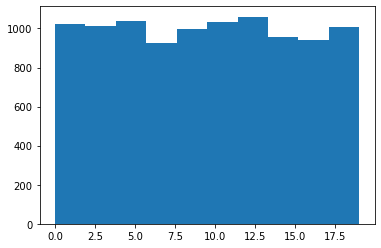

In [91]:
plt.hist(c)

In [31]:
import numpy as np
rng = np.random.default_rng()

rng.random()

0.48146256978601865

In [36]:
rng.random(5,)

array([0.49751241, 0.77296742, 0.51722289, 0.10358042, 0.11403754])

In [82]:
y = 9500 * rng.random((100, 3)) - 500

(array([[10.,  8., 10.,  9., 11.,  7.,  7., 15.,  9., 14.],
        [12.,  6.,  7., 13.,  9., 12., 10., 12., 12.,  7.],
        [12.,  9.,  9.,  5., 12.,  7., 10., 12., 16.,  8.]]),
 array([-494.82772073,  454.16135892, 1403.15043857, 2352.13951821,
        3301.12859786, 4250.1176775 , 5199.10675715, 6148.0958368 ,
        7097.08491644, 8046.07399609, 8995.06307573]),
 <a list of 3 Lists of Patches objects>)

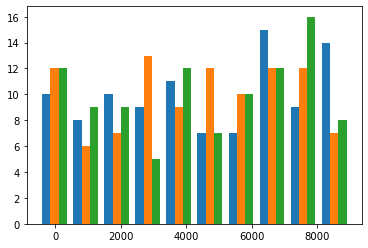

In [83]:
plt.hist(y)

In [3]:
from numpy.random import default_rng
rng = default_rng()
vals = rng.standard_normal(10)
more_vals = rng.standard_normal(10)

In [4]:
vals

array([-0.11975924,  1.2958717 ,  1.89866981, -0.16070076, -0.00387517,
        1.16025678,  0.09373206,  0.93744131, -1.40606084, -1.38096927])

In [5]:
more_vals

array([ 0.0595125 , -1.38650497,  0.88048078, -1.72434907, -0.27835623,
       -0.03278224, -0.69687451,  0.64711355, -1.82838915, -1.11014821])

In [6]:
import matplotlib.pyplot as plt

(array([2., 0., 0., 2., 2., 0., 0., 2., 1., 1.]),
 array([-1.40606084, -1.07558778, -0.74511471, -0.41464165, -0.08416858,
         0.24630448,  0.57677755,  0.90725062,  1.23772368,  1.56819675,
         1.89866981]),
 <a list of 10 Patch objects>)

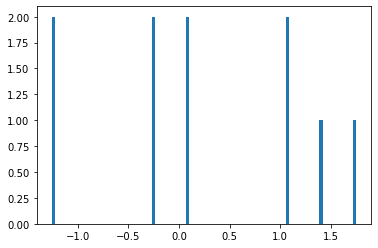

In [7]:
plt.hist(vals, rwidth=0.1)

In [8]:
vals

array([-0.11975924,  1.2958717 ,  1.89866981, -0.16070076, -0.00387517,
        1.16025678,  0.09373206,  0.93744131, -1.40606084, -1.38096927])

(array([2., 0., 0., 2., 2., 0., 0., 2., 1., 1.]),
 array([-1.40606084, -1.07558778, -0.74511471, -0.41464165, -0.08416858,
         0.24630448,  0.57677755,  0.90725062,  1.23772368,  1.56819675,
         1.89866981]),
 <a list of 10 Patch objects>)

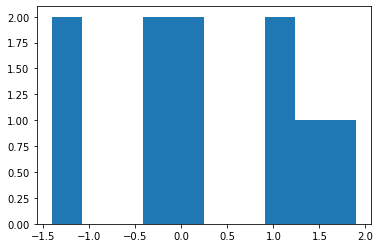

In [9]:
plt.hist(vals)

(array([2., 1., 1., 0., 1., 1., 2., 0., 0., 2.]),
 array([-1.82838915, -1.55750216, -1.28661516, -1.01572817, -0.74484118,
        -0.47395419, -0.20306719,  0.0678198 ,  0.33870679,  0.60959378,
         0.88048078]),
 <a list of 10 Patch objects>)

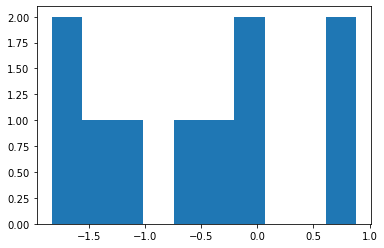

In [10]:
plt.hist(more_vals)

(array([2., 1., 1., 0., 1., 1., 2., 0., 0., 2.]),
 array([-1.82838915, -1.55750216, -1.28661516, -1.01572817, -0.74484118,
        -0.47395419, -0.20306719,  0.0678198 ,  0.33870679,  0.60959378,
         0.88048078]),
 <a list of 10 Patch objects>)

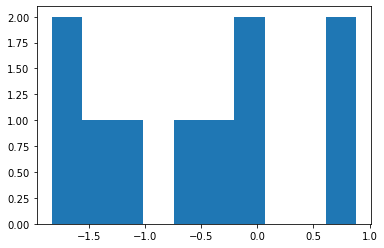

In [11]:
plt.hist(more_vals)

In [25]:
from numpy import random
x = random.randint(100)
x

39